In [1]:
#import dependencies
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator
import holoviews
import hvplot.pandas
from warnings import filterwarnings

In [2]:
filterwarnings("ignore")
sns.set_theme()

In [3]:
finance_df = pd.read_csv("Financial_stock_data.csv")
# auto_df = pd.read_csv("final_auto_stock_data.csv")
# tech_df = pd.read_csv("tech_data.csv")
auto_df = pd.read_csv("../Automotive/final_auto_stock_data.csv")
tech_df = pd.read_csv("../tech/tech_data.csv")
tech_df["Industry"].replace("Semiconductors", "Semiconductors-Tech", inplace = True)
tech_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,NVDA,Technology,Semiconductors-Tech,195.78,199.50,194.500,199.35,8303752.0
1,2018-01-03,NVDA,Technology,Semiconductors-Tech,204.10,213.70,203.750,212.47,22499518.0
2,2018-01-04,NVDA,Technology,Semiconductors-Tech,215.76,218.05,212.690,213.59,14346675.0
3,2018-01-05,NVDA,Technology,Semiconductors-Tech,214.19,216.91,211.080,215.40,14008768.0
4,2018-01-08,NVDA,Technology,Semiconductors-Tech,220.40,225.00,218.580,222.00,21190932.0
...,...,...,...,...,...,...,...,...,...
27715,2023-11-28,CTSH,Technology,Infotech,70.70,71.52,70.700,71.30,2607377.0
27716,2023-11-29,CTSH,Technology,Infotech,71.60,71.80,69.895,70.12,3521683.0
27717,2023-11-30,CTSH,Technology,Infotech,70.39,70.52,69.800,70.38,8254394.0
27718,2023-12-01,CTSH,Technology,Infotech,70.23,70.87,70.080,70.82,2672566.0


In [4]:
auto_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.6700,43.190,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.8500,43.200,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.9500,43.300,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.8800,43.030,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.8600,43.280,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
28602,2023-11-28,INTC,Automobiles,Semiconductors,43.69,44.3827,43.660,44.23,24548874.0
28603,2023-11-29,INTC,Automobiles,Semiconductors,44.60,45.3400,44.600,44.94,38982026.0
28604,2023-11-30,INTC,Automobiles,Semiconductors,44.65,45.0900,44.410,44.70,46262971.0
28605,2023-12-01,INTC,Automobiles,Semiconductors,44.36,44.3600,42.860,43.74,43928371.0


In [5]:
merge1_df = pd.merge(finance_df, tech_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merged_df = pd.merge(merge1_df, auto_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merged_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,WD,Finance,Mortgage,47.700001,47.919998,47.259998,47.320000,181300.0
1,2018-01-03,WD,Finance,Mortgage,47.230000,47.230000,46.090000,46.130001,134800.0
2,2018-01-04,WD,Finance,Mortgage,46.189999,46.810001,46.090000,46.099998,140200.0
3,2018-01-05,WD,Finance,Mortgage,46.110001,48.060001,45.349998,47.980000,336900.0
4,2018-01-08,WD,Finance,Mortgage,48.160000,48.880001,47.369999,47.820000,310100.0
...,...,...,...,...,...,...,...,...,...
85339,2023-11-28,INTC,Automobiles,Semiconductors,43.690000,44.382700,43.660000,44.230000,24548874.0
85340,2023-11-29,INTC,Automobiles,Semiconductors,44.600000,45.340000,44.600000,44.940000,38982026.0
85341,2023-11-30,INTC,Automobiles,Semiconductors,44.650000,45.090000,44.410000,44.700000,46262971.0
85342,2023-12-01,INTC,Automobiles,Semiconductors,44.360000,44.360000,42.860000,43.740000,43928371.0


# **Overall Performance**

In [6]:
#defining lists to append calculated data
open_price = []
close_price = []
change_price = []
ticker = []
sector = []
industry = []
year_ls = []

#loop through each ticker
for symbols in merged_df["Ticker"].unique():

    #dataframe for each iteration of loop
    con_df = merged_df.loc[merged_df["Ticker"] == symbols]

    #convert the "date" column to datetime
    con_df["Date"] = pd.to_datetime(con_df["Date"])

    #find the Open price with the earliest date
    earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]

    #find the Close price with the latest date
    latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]

    #calculate change in price
    percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

    #appending data in lists
    ticker.append(symbols)
    sector.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
    industry.append(con_df.loc[con_df["Date"].idxmin(), "Industry"])
    open_price.append(earliest_date_row)
    close_price.append(latest_date_row)
    change_price.append(percent_change_price)


analysis_df = pd.DataFrame({
    "Ticker" : ticker,
    "Sector" : sector,
    "Industry" : industry,
    "Initial Open" : open_price,
    "Final Close" : close_price,
    "Total Change in Percent" : change_price

})
analysis_df

,Ticker,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,WD,Finance,Mortgage,47.700001,89.870003,88.406711
1,PFSI,Finance,Mortgage,22.350000,79.779999,256.957483
2,LDI,Finance,Mortgage,14.000000,1.980000,-85.857143
3,GHI,Finance,Mortgage,18.150000,17.040001,-6.115695
4,COOP,Finance,Mortgage,10.320000,62.709999,507.655048
5,AFL,Finance,Insurance,44.180000,82.610001,86.985061
6,HIG,Finance,Insurance,56.340000,77.820000,38.125665
7,PRU,Finance,Insurance,115.169998,97.739998,-15.134150
8,ALL,Finance,Insurance,104.070000,137.679993,32.295564
9,PGR,Finance,Insurance,56.459999,162.460007,187.743552


# Performance by Sector

In [41]:
#group the data by Sector and Industry to calculate average change in price for each industry under each sector
perf_by_sector = pd.DataFrame(analysis_df.groupby(["Sector", "Industry"])["Total Change in Percent"].mean())

#show the result
perf_by_sector

Total Change in Percent
Sector      Industry                                         
Automobiles Auto & Truck Dealerships               111.703054
            Auto Manufacturers                      -4.721549
            Auto Parts                               7.787522
            Semiconductors                         311.366607
Finance     Asset Management                        18.186490
            Credit Services                         81.657920
            Insurance                               66.003138
            Mortgage                               152.209281
Technology  Consumer                                90.539044
            Infotech                                26.190427
            Semiconductors-Tech                    311.366607
            Software                               161.812711

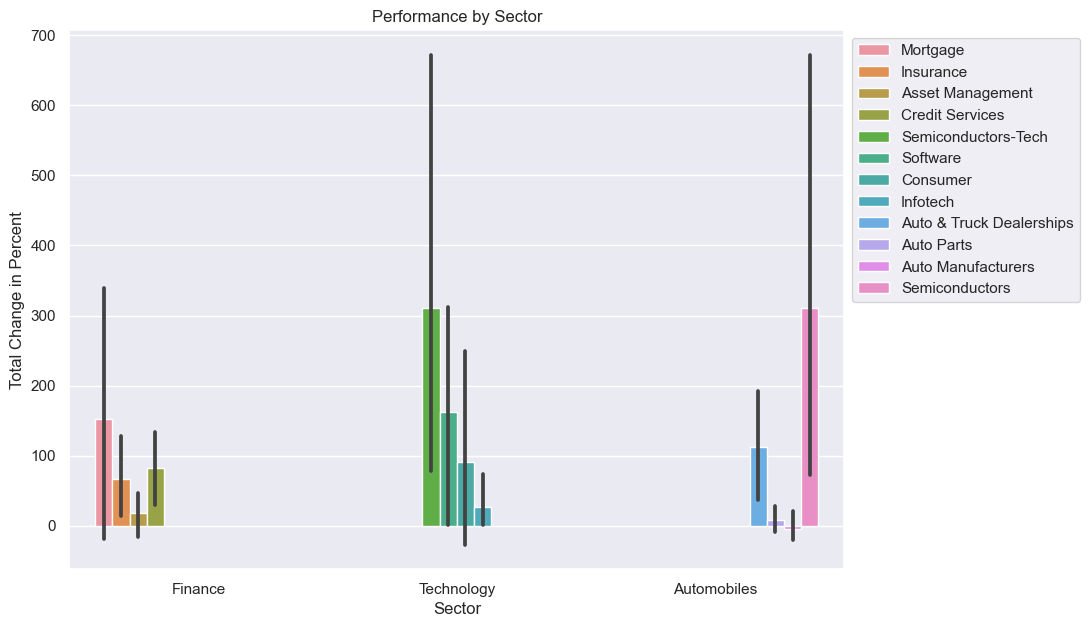

In [42]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(analysis_df, x="Sector", y="Total Change in Percent", hue ="Industry")
ax.legend(loc = "best", bbox_to_anchor=(1, 1))
ax.set_title("Performance by Sector")
plt.show()

# **Best Performers by Sector**

In [43]:
#idxmax returns the index of the max value
best_performer_df = analysis_df.iloc[analysis_df.groupby("Sector")["Total Change in Percent"].idxmax()].reset_index(drop = True)
best_performer_df

,Ticker,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,AMD,Automobiles,Semiconductors,10.42,118.570000,1037.907869
1,COOP,Finance,Mortgage,10.32,62.709999,507.655048
2,AMD,Technology,Semiconductors-Tech,10.42,118.570000,1037.907869


In [44]:
top_performers_by_sector = best_performer_df["Ticker"]
ls= []
for ticker in top_performers_by_sector:
    line_df = merged_df.loc[(merged_df["Ticker"] == ticker),["Ticker","Date", "Close"]]
    line_df["Year"] = pd.to_datetime(line_df["Date"]).dt.year

    ls.append(line_df)
plot_df = pd.concat(ls, ignore_index = True)
plot_df["Date"] = pd.to_datetime(plot_df["Date"])
plot_df

,Ticker,Date,Close,Year
0,AMD,2018-01-02,10.98,2018
1,AMD,2018-01-03,11.55,2018
2,AMD,2018-01-04,12.12,2018
3,AMD,2018-01-05,11.88,2018
4,AMD,2018-01-08,12.28,2018
...,...,...,...,...
7449,AMD,2023-11-28,122.01,2023
7450,AMD,2023-11-29,123.85,2023
7451,AMD,2023-11-30,121.16,2023
7452,AMD,2023-12-01,121.39,2023


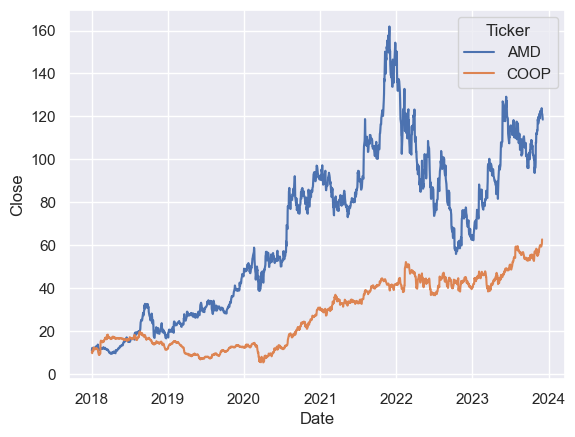

In [45]:
fig1 = sns.lineplot(data=plot_df, x = "Date", y = "Close", hue = "Ticker")

fig1.xaxis.set_major_locator(YearLocator())

plt.show()

# **Performance by Year**

In [12]:
#convert "date" column to respective year using datetime
merged_df["Year"] = pd.to_datetime(merged_df["Date"]).dt.year

#defining lists to append calculated data
open_price = []
close_price = []
change_price = []
ticker = []
sector = []
industry = []
year_ls = []

#loop thorugh data based on year
for year in merged_df["Year"].unique():

    #dataframe for each iteration of loop
    yearly_df = merged_df.loc[merged_df["Year"] == year]

    #loop through each ticker for that specific year
    for symbols in yearly_df["Ticker"].unique():

        #dataframe for each iteration of loop
        con_df = yearly_df.loc[yearly_df["Ticker"] == symbols]

        #convert the "date" column to datetime
        con_df["Date"] = pd.to_datetime(con_df["Date"])

        #find the Open price with the earliest date
        earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]

        #find the Close price with the latest date
        latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]

        #calculate change in price
        percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

        #appending data in lists
        ticker.append(symbols)
        sector.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
        industry.append(con_df.loc[con_df["Date"].idxmin(), "Industry"])
        open_price.append(earliest_date_row)
        close_price.append(latest_date_row)
        change_price.append(percent_change_price)
        year_ls.append(year)

#creating a dataframe with calculated data
top_by_year = pd.DataFrame({
    "Ticker" : ticker,
    "Year" : year_ls,
    "Sector" : sector,
    "Industry" : industry,
    "Initial Open" : open_price,
    "Final Close" : close_price,
    "Total Change in Percent" : change_price

})
#show the dataframe
top_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,WD,2018,Finance,Mortgage,47.700001,43.250000,-9.329142
1,PFSI,2018,Finance,Mortgage,22.350000,21.260000,-4.876958
2,GHI,2018,Finance,Mortgage,18.150000,16.860001,-7.107433
3,COOP,2018,Finance,Mortgage,10.320000,11.670000,13.081399
4,AFL,2018,Finance,Insurance,44.180000,45.560001,3.123588
...,...,...,...,...,...,...,...
310,TSLA,2023,Automobiles,Auto Manufacturers,118.470000,235.580000,98.852030
311,TM,2023,Automobiles,Auto Manufacturers,137.960000,187.370000,35.814729
312,HMC,2023,Automobiles,Auto Manufacturers,23.090000,30.260000,31.052404
313,GM,2023,Automobiles,Auto Manufacturers,34.015000,33.070000,-2.778186


In [13]:
#group the data by Year and Sector to calculate average change in price for each Sector in each year
perf_by_year = pd.DataFrame(top_by_year.groupby(["Year", "Sector"])["Total Change in Percent"].mean())

#show the dataframe
perf_by_year

Total Change in Percent
Year Sector                              
2018 Automobiles               -20.714898
     Finance                   -11.083345
     Technology                 -2.052172
2019 Automobiles                39.435275
     Finance                    33.834788
     Technology                 45.897577
2020 Automobiles                25.248048
     Finance                    18.944464
     Technology                 35.412201
2021 Automobiles                40.378673
     Finance                    24.180602
     Technology                 23.623968
2022 Automobiles               -30.253727
     Finance                   -13.455324
     Technology                -34.862062
2023 Automobiles                17.320288
     Finance                    11.664808
     Technology                 43.712239

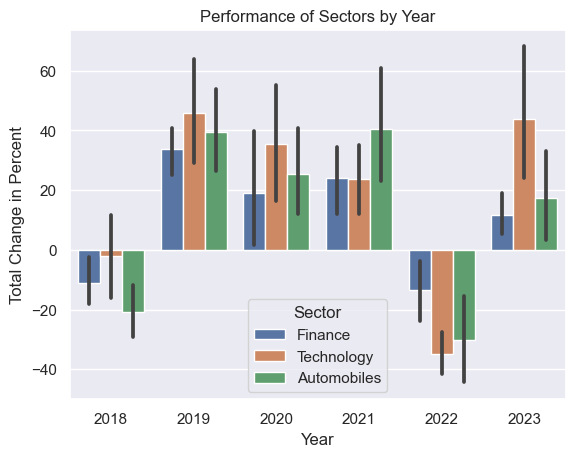

In [14]:
#plot data by Year and Sector
sns.barplot(top_by_year, x="Year", y="Total Change in Percent", hue="Sector").set(title='Performance of Sectors by Year')

#show the result
plt.show()

In [15]:
#group the data by Year to ticker data with th max positive change in price for that year
grouped_df1 = top_by_year.groupby(["Year"])["Total Change in Percent"].idxmax()
best_by_year = top_by_year.iloc[grouped_df1, :]

#show the result
best_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
22,AMD,2018,Technology,Semiconductors-Tech,10.42,18.460000,77.159309
73,AMD,2019,Technology,Semiconductors-Tech,18.01,45.860000,154.636313
105,COOP,2020,Finance,Mortgage,12.54,31.030001,147.448172
206,F,2021,Automobiles,Auto Manufacturers,8.81,20.770000,135.754824
251,MBLY,2022,Automobiles,Auto Parts,26.71,35.060000,31.261700
281,NVDA,2023,Technology,Semiconductors-Tech,148.51,455.100000,206.444011


# **Top Performers by Year**

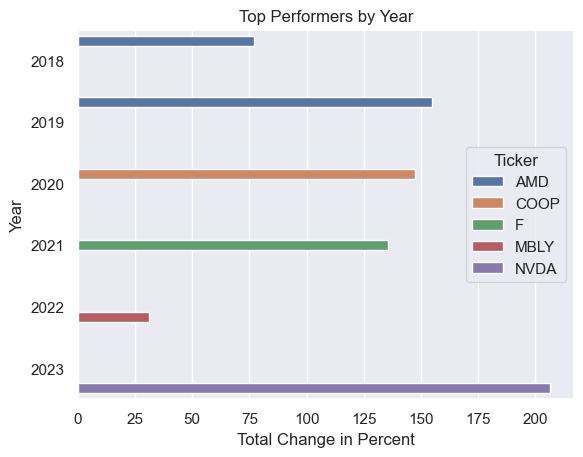

In [16]:
#plot the best performing stock for every year
sns.barplot(best_by_year, x = "Total Change in Percent", y="Year", orient="h", hue = "Ticker").set(title='Top Performers by Year')

#show the result
plt.show()

# **Bottom Performers by Year**

In [17]:
#group the data by Year to ticker data with th max negative change in price for that year
grouped_df2 = top_by_year.groupby(["Year"])["Total Change in Percent"].idxmin()
worst_by_year = top_by_year.iloc[grouped_df2, :]

#show the result
worst_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
45,ALV,2018,Automobiles,Auto Parts,127.51,70.23,-44.921967
82,LPL,2019,Technology,Consumer,8.00,6.94,-13.250000
131,AAPL,2020,Technology,Consumer,296.24,132.69,-55.208615
156,LDI,2021,Finance,Mortgage,14.00,4.80,-65.714284
256,TSLA,2022,Automobiles,Auto Manufacturers,1147.75,123.18,-89.267698
290,ZI,2023,Technology,Software,30.67,14.71,-52.037822


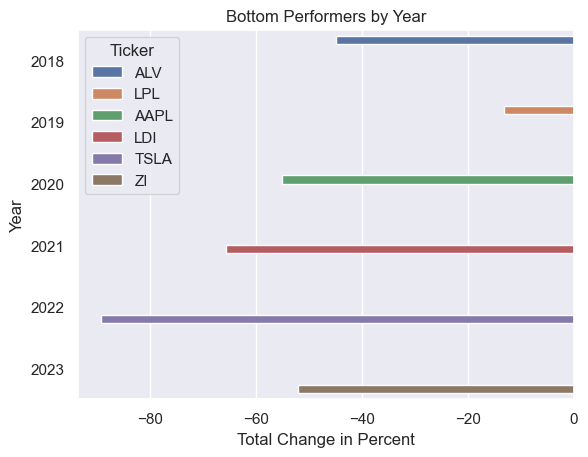

In [18]:
#plot the worst performing stock for every year
ax = sns.barplot(worst_by_year, x = "Total Change in Percent", y="Year", orient="h", hue = "Ticker").set(title='Bottom Performers by Year')

#show the result
plt.show()

In [53]:
#%matplotlib notebook
# Configure the map plot
pic = worst_by_year.hvplot.barh(
                            "Year",
                            "Total Change in Percent",
                            frame_width = 500,
                            frame_height = 300,
                            color = "Ticker",
                            colorbar = True,
                            clabel="Year", 
                            cmap="coolwarm",
                            hover_cols = ["Ticker", "Year", "Sector", "Industry", "Initial Open", "Final Close", "Total Change in Percent"],
                            title = "Bottom Performers by Year"

)

# Display the map
pic

:Bars   [Year]   (Total Change in Percent,Ticker,Sector,Industry,Initial Open,Final Close)

In [39]:
#defining lists to append calculated data
open_price = []
close_price = []
change_price = []
ticker = []
sectors = []
industry = []

for sector in merged_df["Sector"].unique():

    sector_df = merged_df.loc[merged_df["Sector"] == sector]

    #loop through each ticker
    for symbols in sector_df["Ticker"].unique():

        #dataframe for each iteration of loop
        con_df = sector_df.loc[sector_df["Ticker"] == symbols]

        #convert the "date" column to datetime
        con_df["Date"] = pd.to_datetime(con_df["Date"])

        #find the Open price with the earliest date
        earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]

        #find the Close price with the latest date
        latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]

        #calculate change in price
        percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

        #appending data in lists
        ticker.append(symbols)
        sectors.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
        industry.append(con_df.loc[con_df["Date"].idxmin(), "Industry"])
        open_price.append(earliest_date_row)
        close_price.append(latest_date_row)
        change_price.append(percent_change_price)


analysis_df = pd.DataFrame({
    "Ticker" : ticker,
    "Sector" : sectors,
    "Industry" : industry,
    "Initial Open" : open_price,
    "Final Close" : close_price,
    "Total Change in Percent" : change_price

})
analysis_df

,Ticker,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,WD,Finance,Mortgage,47.700001,89.870003,88.406711
1,PFSI,Finance,Mortgage,22.350000,79.779999,256.957483
2,LDI,Finance,Mortgage,14.000000,1.980000,-85.857143
3,GHI,Finance,Mortgage,18.150000,17.040001,-6.115695
4,COOP,Finance,Mortgage,10.320000,62.709999,507.655048
5,AFL,Finance,Insurance,44.180000,82.610001,86.985061
6,HIG,Finance,Insurance,56.340000,77.820000,38.125665
7,PRU,Finance,Insurance,115.169998,97.739998,-15.134150
8,ALL,Finance,Insurance,104.070000,137.679993,32.295564
9,PGR,Finance,Insurance,56.459999,162.460007,187.743552
